<a href="https://colab.research.google.com/github/mdaugherity/Numerical-2021/blob/main/random/Week_9_Chaos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Special Topic - Chaos 
Dr. Daugherity, PHYS 451, Spring 2021. 

## Logistic Map

This is a famous example of a simple equation which demonstrates the key features of chaos.  

$f(x) = \mu x (1-x)$

One physical system the logistic map models is population growth with carrying capacity.  We can define variables:
* $x$ = population fraction of carrying capacity
* $x_0$ = initial population 
* $x_i$ = population of the $i$th generation
* $\mu$ = growth parameter ($\mu=1$ is no growth)
* $x_{i+1}=f(x_i)$


https://en.wikipedia.org/wiki/Logistic_map

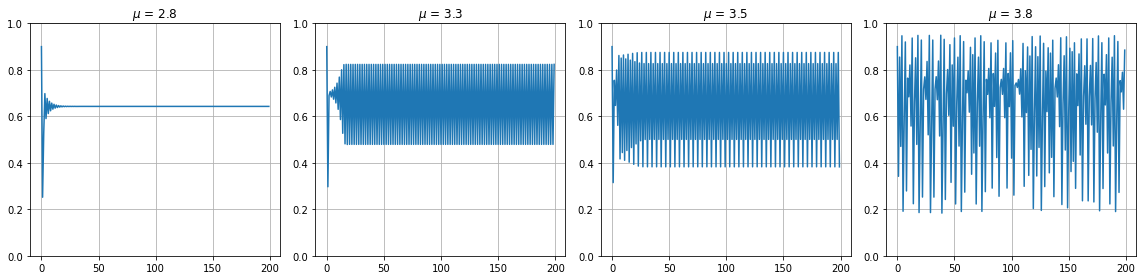

In [3]:
# PARAMETERS TO ADJUST
x0 = 0.9 # initial pop
N = 200 # num of generations
MULIST = [2.8, 3.3, 3.5, 3.8]  # mu values, crit = 3.828427

# Initialize Vars
NUM = len(MULIST)
n = np.arange(N)

def runmap(mu, x0=0.75, N=30):
  # Runs logistic map x_i+1 = f(x_i)
  x = np.zeros(N)
  x[0] = x0
  for i in range(0,N-1):
    x[i+1] = mu*x[i]*(1-x[i])
  return x

plt.figure(figsize=(16,4))
for i in range(NUM):
  mu = MULIST[i]
  x = runmap(mu,x0,N)
  plt.subplot(1,4,i+1)
  plt.plot(n,x)
  plt.title(f'$\mu$ = {mu}')
  plt.grid()
  plt.ylim(0,1)

plt.tight_layout()
plt.show()

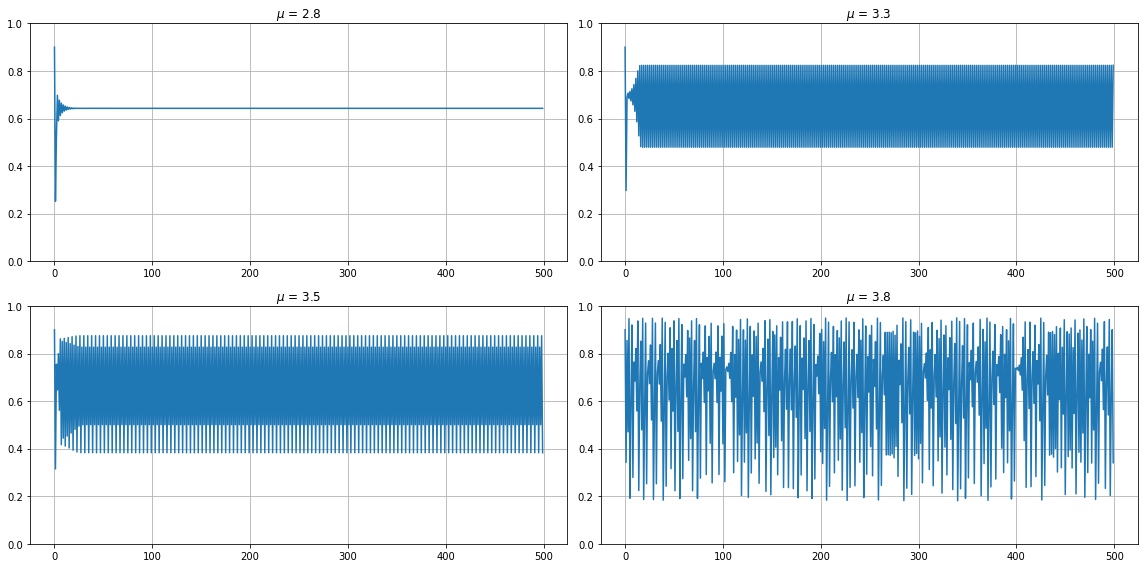

In [7]:
# Alternate wide format
# PARAMETERS TO ADJUST
x0 = 0.9 # initial pop
N = 500 # num of generations
MULIST = [2.8, 3.3, 3.5, 3.8]  # mu values, crit = 3.828427

# Initialize Vars
NUM = len(MULIST)
n = np.arange(N)

plt.figure(figsize=(16,8))
for i in range(NUM):
  mu = MULIST[i]
  x = runmap(mu,x0,N)
  plt.subplot(2,2,i+1)
  plt.plot(n,x)
  plt.title(f'$\mu$ = {mu}')
  plt.grid()
  plt.ylim(0,1)

plt.tight_layout()
plt.show()

## Bifurcation Diagram
Visualize dependence on $\mu$.  The algorithm is:

For each $\mu$ value:
* choose $x_0$
* run $N$ generations
* plot only the last value $x_N$
* repeat for many $x_0$ values 

Systemically do this for many $\mu$'s and you get a diagram that shows where system is periodic or chaotic.  

Features to notice:
* period doubling - how a small change in $\mu$ causes number of outcomes to double
* onset of chaos when period doubles infinitely fast
* fractals from self-similar behavior!




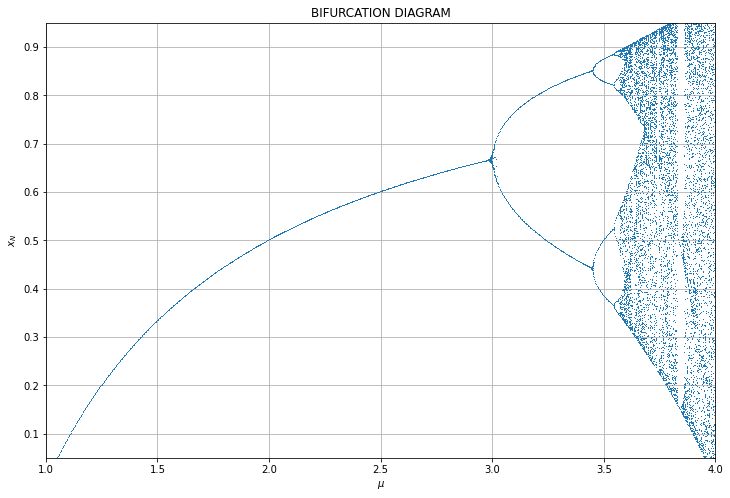

In [6]:
# PARAMETERT TO ADJUST
MULIST = np.linspace(1,4, 1000) # horizontal range of plot
X0LIST = np.linspace(0.05,0.95, 100)  # vertical range 
N = 200 # number of generations, must be "big enough"

xdata = []
mudata = []
for mu in MULIST:
  for x0 in X0LIST:
    x = x0
    for i in range(N):
      x = mu*x*(1-x)  # not storing all values
    mudata.append(mu)
    xdata.append(x)

plt.figure(figsize=(12,8))
plt.plot(mudata,xdata,',')
plt.xlim(MULIST[0], MULIST[-1]) # remove edge around plot
plt.ylim(X0LIST[0],X0LIST[-1])
plt.xlabel('$\mu$')
plt.ylabel('$x_N$')
plt.title('BIFURCATION DIAGRAM')
plt.grid()
plt.show()